# STEAM DATA TREND (2024)


# DESCRIPTION

We want to chart:
Average playtime vs publisher class
Average playtime vs review score
Average playtime vs price

# MISC

-- Data set did not specify currency, had to double check to make sure  
-- Some games might have been translated indepdently, steamId still valid  
-- Some games are incorrectly labeled or missing information (WWE 2k24 was deluxe edition)  
-- Found a price outlierr in wwe 2k24 since (99.99)  
-- Revenue data based on estimates

## About this data set:
This dataset contains comprehensive information on the top 1500 games released on Steam between January 1, 2024, and September 9, 2024. Aggregated from 30 separate files, and combined into a single dataset. Minor adjustments were made, such as aligning game release dates for consistency.

## Key Features:
Game Details: Includes titles, release dates, and developer/publisher information.
Sales and Revenue: Tracks the number of copies sold, revenue generated, and pricing details.
Player Engagement: Provides average playtime, peak player counts, and other user engagement metrics.
Reviews and Scores: Features review scores and ratings.
Dynamic Market Data: Offers insights into game performance trends over time, such as sales rank and price fluctuations.


In [103]:
import pandas as pd

data = pd.read_csv('./Steam_2024_bestRevenue_1500.csv')


data.sort_values(by='revenue', ascending=False, inplace=True)

#data cleaning
#data.isna().sum()
#data.info()

data.head(20)

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
1450,Black Myth: Wukong,19-08-2024,15517278,59.99,837793356.0,20.065041,96,AAA,Game Science,Game Science,2358720
1451,HELLDIVERS™ 2,08-02-2024,11905198,39.99,435635596.0,39.205960,71,AAA,PlayStation Publishing LLC,Arrowhead Game Studios,553850
1452,Palworld,18-01-2024,16704850,29.99,392328553.0,41.840761,94,AA,Pocketpair,Pocketpair,1623730
1453,Sons Of The Forest,22-02-2024,8693478,29.99,217017892.0,17.341205,86,AA,Newnight,Endnight Games Ltd,1326470
1454,Dragon's Dogma 2,21-03-2024,1785028,69.99,111478291.0,31.687050,0,AAA,"CAPCOM Co., Ltd.","CAPCOM Co., Ltd.",2054970
1455,The First Descendant,30-06-2024,4043850,0.00,102244808.0,49.870230,55,AA,NEXON,"NEXON Games Co., Ltd.",2074920
1456,Last Epoch,21-02-2024,3300623,34.99,97723674.0,51.955238,86,AA,Eleventh Hour Games,Eleventh Hour Games,899770
1457,7 Days to Die,25-07-2024,9877443,44.99,89781931.0,85.913585,89,AA,The Fun Pimps Entertainment LLC,The Fun Pimps,251570
1458,V Rising,08-05-2024,4784609,34.99,83614738.0,32.695293,0,AA,Stunlock Studios,Stunlock Studios,1604030
1459,Manor Lords,26-04-2024,2294915,39.99,63098408.0,16.702169,88,AA,Hooded Horse,Slavic Magic,1363080


Will investigate  missing developers and publishers

In [84]:
data[data['developers'].isna()]

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
643,YUME 4,12-01-2024,18572,4.99,54457.0,1.225076,78,Indie,Lovely Games,NaN,2602730
765,Hypnosis Card,19-01-2024,10812,4.99,41891.0,2.016618,77,Indie,Lovely Games,NaN,2544990


In [85]:
data[data['publishers'].isna()]

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
710,Pixel Noir,08-02-2024,3129,24.99,47871.0,8.461324,67,Hobbyist,NaN,SWDTech Games,754320


Using Steam ID we identified developers and publishers for the missing data

In [86]:
data.loc[data['steamId'] == 2602730, 'developers'] = 'Lovely Games'
data.loc[data['steamId'] == 2544990, 'developers'] = 'Naku kinoko'
data.loc[data['steamId'] == 754320, 'publishers'] = 'SWDTech Games'

In [87]:
data[data['developers'].isna()]
data[data['publishers'].isna()]

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId


In [88]:
print(data.duplicated().sum())

0


Found no duplicates

In [89]:
(data == "").sum()
(data == " ").sum()


name              0
releaseDate       0
copiesSold        0
price             0
revenue           0
avgPlaytime       0
reviewScore       0
publisherClass    0
publishers        0
developers        0
steamId           0
dtype: int64

checked for empty strings and blank spaces

In [90]:
columns_to_check = ['price', 'copiesSold', 'revenue', 'avgPlaytime', 'reviewScore']
data[data[columns_to_check].lt(0).any(axis=1)]

data.sort_values(by='copiesSold', ascending=False, inplace=True)

print(data.head())

                    name releaseDate  copiesSold  price       revenue  \
1403              Banana  23-04-2024    30739148   0.00  3.129158e+05   
1452            Palworld  18-01-2024    16704850  29.99  3.923286e+08   
1450  Black Myth: Wukong  19-08-2024    15517278  59.99  8.377934e+08   
1451       HELLDIVERS™ 2  08-02-2024    11905198  39.99  4.356356e+08   
1457       7 Days to Die  25-07-2024     9877443  44.99  8.978193e+07   

      avgPlaytime  reviewScore publisherClass  \
1403    26.142054           85          Indie   
1452    41.840761           94             AA   
1450    20.065041           96            AAA   
1451    39.205960           71            AAA   
1457    85.913585           89             AA   

                           publishers                    developers  steamId  
1403                              Sky  Sky,AestheticSpartan,O'Brian  2923300  
1452                       Pocketpair                    Pocketpair  1623730  
1450                     Game

Checked for negative values in numerical columns

Define a function to remove outliers for each group

In [91]:
def remove_outliers(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['price'] >= lower_bound) & (group['price'] <= upper_bound)]


data = data.groupby('publisherClass', group_keys=False).apply(remove_outliers)


p-value=  6.787460869333341e-33
data is not normalized


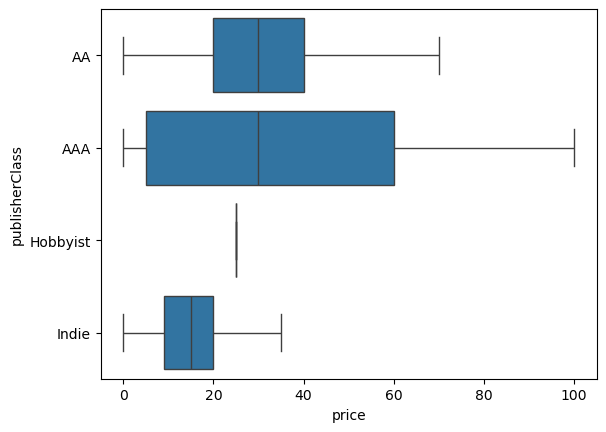

In [92]:
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt

stat, p = shapiro(data['price'])
print('p-value= ', p)
if p > 0.05:
    print('data is normalized')
else:
    print('data is not normalized')

sns.boxplot(data, x='price', y='publisherClass')
plt.show()


Some publishers are classified as indie when they probably AA. Bushiroad is a major japanesse media company as an example

Data is not normalized so will do kruskal-Wallis test

we removed the hobbyist group because we were unsure of the labeling

In [94]:
from scipy.stats import kruskal

class_AAA = data[data['publisherClass'] == 'AAA']['price']
class_indie = data[data['publisherClass'] == 'Indie']['price']
class_AA = data[data['publisherClass'] == 'AA']['price']

stat, p = kruskal(class_AAA, class_indie, class_AA)

print('p-value= ', p)


p-value=  1.6556017297765437e-35


Shows again that data is not normalized

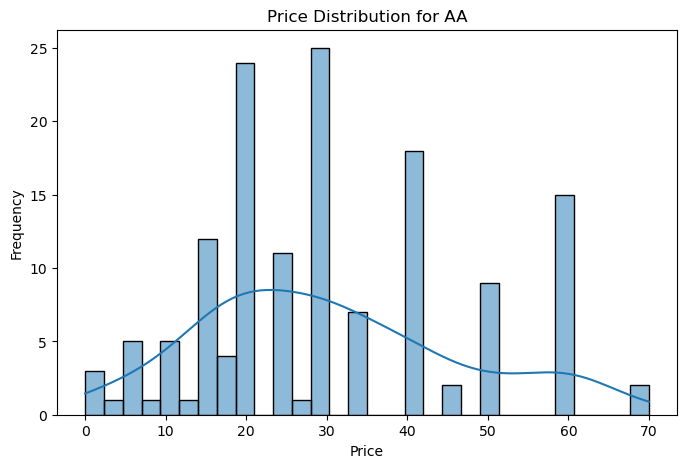

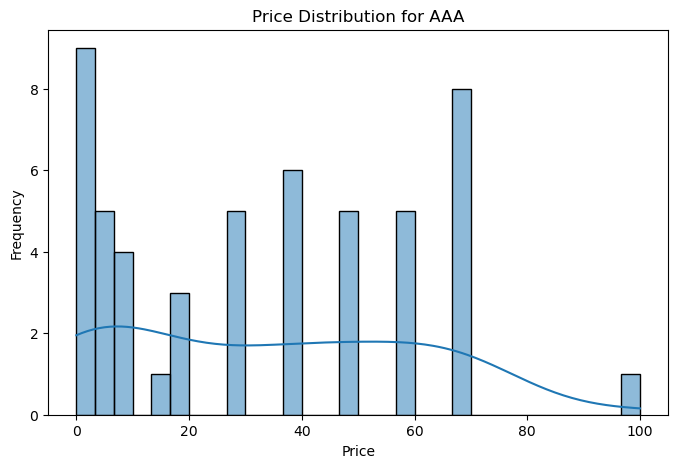

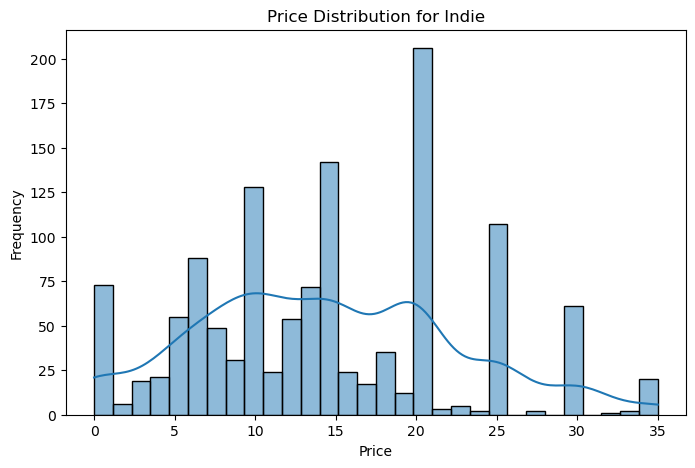

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt


data = data[data['publisherClass'] != 'Hobbyist']
classes = data['publisherClass'].unique()

for publisher_class in classes:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[data['publisherClass'] == publisher_class]['price'], kde=True, bins=30)
    plt.title(f'Price Distribution for {publisher_class}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

we reasearched the potential outliner and found out 

Final result with a histogram